there's a dbscan function from a sklearn library, but maybe we should still write our own dbscan algorithm and then verify it with the sklearn dbscan function?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import csv
import math

# Set the parameters for the smiley face
center_x = 0
center_y = 0
radius = 5
eye_radius = 0.5
eye_offset = 2
mouth_radius = 3
mouth_angle = math.pi / 3

# Generate points for the face
face_points = []
for angle in range(360):
    angle_rad = math.radians(angle)
    x = center_x + radius * math.cos(angle_rad)
    y = center_y + radius * math.sin(angle_rad)
    face_points.append((x, y))

# Generate points for the eyes
left_eye_center_x = center_x - eye_offset
left_eye_center_y = center_y + eye_offset
right_eye_center_x = center_x + eye_offset
right_eye_center_y = center_y + eye_offset

eye_points = []
for angle in range(360):
    angle_rad = math.radians(angle)
    x_left = left_eye_center_x + eye_radius * math.cos(angle_rad)
    y_left = left_eye_center_y + eye_radius * math.sin(angle_rad)
    x_right = right_eye_center_x + eye_radius * math.cos(angle_rad)
    y_right = right_eye_center_y + eye_radius * math.sin(angle_rad)
    eye_points.append((x_left, y_left))
    eye_points.append((x_right, y_right))

# Generate points for the mouth
mouth_points = []
for angle in range(int(math.degrees(-mouth_angle)), int(math.degrees(mouth_angle)) + 1):
    angle_rad = math.radians(angle)
    x = center_x + mouth_radius * math.cos(angle_rad)
    y = center_y - mouth_radius * math.sin(angle_rad)
    mouth_points.append((x, y))

# Combine all points
points = face_points + eye_points + mouth_points

# Save points to CSV file
filename = "smiley_face.csv"
with open(filename, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["x", "y"])
    writer.writerows(points)

print(f"CSV file '{filename}' created successfully.")

CSV file 'smiley_face.csv' created successfully.


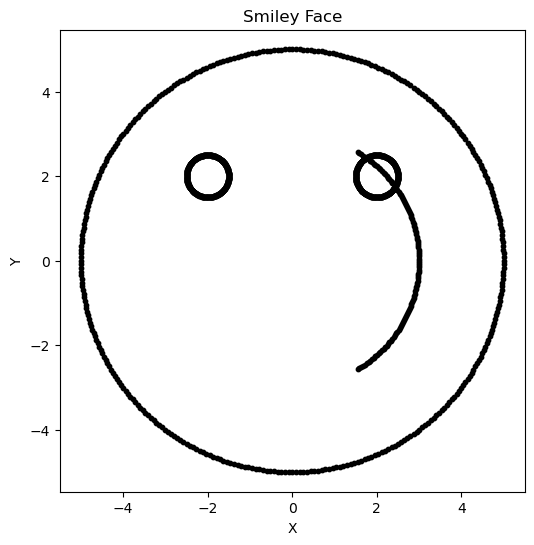

In [4]:
import csv
import matplotlib.pyplot as plt

# Read data from CSV file
x = []
y = []
with open('smiley_face.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip the header row
    for row in csv_reader:
        x.append(float(row[0]))
        y.append(float(row[1]))

# Create a scatter plot of the smiley face
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=10, color='black')
plt.axis('equal')
plt.title('Smiley Face')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def dbscan(data, epsilon, minPts):
    labels = [0] * len(data)
    clusterID = 0
    neighborPts = []
    for point in range(len(data)):
        if labels[point] != 0:
            continue
        neighborPts = getNeighbors(data, point, epsilon)
        if len(neighborPts) < minPts:
            labels[point] = -1
        else:
            clusterID += 1
            growCluster(data, labels, point, neighborPts, clusterID, epsilon, minPts)
    return labels

In [5]:
def getNeighbors(data, point, epsilon):
    neighbors = []
    for i in range(len(data)):
        if euclideanDistance(data[point], data[i]) <= epsilon:
            neighbors.append(i)
    return neighbors

In [6]:
def growCluster(data, labels, point, neighborPts, clusterID, epsilon, minPts):
    labels[point] = clusterID
    i = 0
    while i < len(neighborPts):
        pn = neighborPts[i]
        if labels[pn] == -1:
            labels[pn] = clusterID
        elif labels[pn] == 0:
            labels[pn] = clusterID
            pnNeighborPts = getNeighbors(data, pn, epsilon)
            if len(pnNeighborPts) >= minPts:
                neighborPts.extend(pnNeighborPts)
        i += 1

In [7]:
def euclideanDistance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5


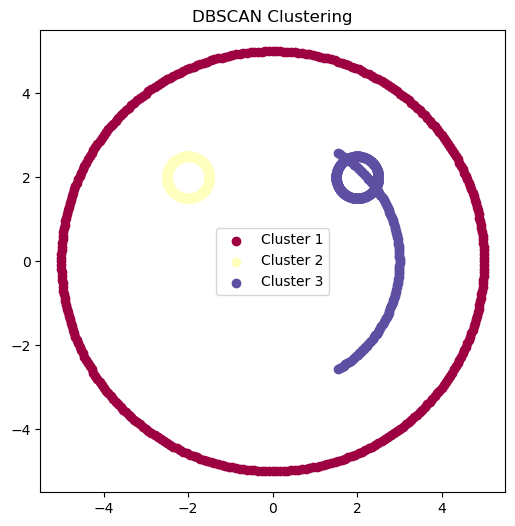

In [8]:
# Read data from CSV file
data = []
with open('smiley_face.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip the header row
    for row in csv_reader:
        x, y = float(row[0]), float(row[1])
        data.append([x, y])

# Run DBSCAN
epsilon = 1.0
minPts = 5
labels = dbscan(data, epsilon, minPts)

# Plot the clusters
plt.figure(figsize=(6, 6))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'black'
    plt.scatter([p[0] for p, l in zip(data, labels) if l == label],
                [p[1] for p, l in zip(data, labels) if l == label],
                color=color, label=f'Cluster {label}' if label != -1 else 'Noise')
plt.legend()
plt.title('DBSCAN Clustering')
plt.show()

In [1]:
import csv

def sort_csv(input_file, output_file):
    # Read data from the input CSV file
    data = []
    with open(input_file, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            data.append(row)

    # Sort the data based on the first dimension
    sorted_data = sorted(data[1:], key=lambda x: float(x[0]))

    # Write the sorted data to the output CSV file
    with open(output_file, 'w', newline='') as file:
        csv_writer = csv.writer(file)
        csv_writer.writerow(data[0])  # Write the header row
        csv_writer.writerows(sorted_data)

    print(f"Sorted data has been written to {output_file}")

# Specify the input and output file names
input_file = 'smiley_face.csv'
output_file = 'sorted_smiley.csv'

# Call the function to sort the CSV file
sort_csv(input_file, output_file)

Sorted data has been written to sorted_smiley.csv


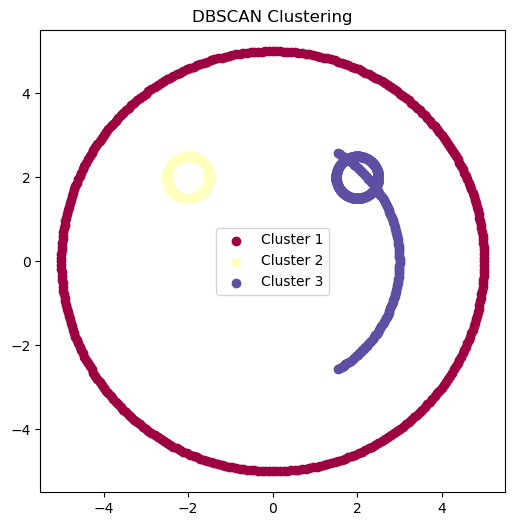

In [13]:
# Read data from CSV file
data = []
with open('sorted_smiley.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip the header row
    for row in csv_reader:
        x, y = float(row[0]), float(row[1])
        data.append([x, y])

# Run DBSCAN
epsilon = 1.0
minPts = 5
labels = dbscan(data, epsilon, minPts)

# Write results to a file
with open('results.txt', 'w') as file:
    file.write("pointID -> clusterID\n\n")
    for i, label in enumerate(labels):
        file.write(f"{i} -> {label}\n")

# Write neighbors to a file
with open('neighbors.txt', 'w') as file:
    file.write("pointID: [neighbors]\n\n")
    for i in range(len(data)):
        neighbors = getNeighbors(data, i, epsilon)
        file.write(f"{i}: {neighbors}\n")


# Plot the clusters
plt.figure(figsize=(6, 6))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'black'
    plt.scatter([p[0] for p, l in zip(data, labels) if l == label],
                [p[1] for p, l in zip(data, labels) if l == label],
                color=color, label=f'Cluster {label}' if label != -1 else 'Noise')
plt.legend()
plt.title('DBSCAN Clustering')
plt.show()

This is the PseudoCode algo

In [ ]:
DBSCAN(DB, distFunc, eps, minPts) {
    C := 0                                                  /* Cluster counter */
    for each point P in database DB {
        if label(P) ≠ undefined then continue               /* Previously processed in inner loop */
        Neighbors N := RangeQuery(DB, distFunc, P, eps)     /* Find neighbors */
        if |N| < minPts then {                              /* Density check */
            label(P) := Noise                               /* Label as Noise */
            continue
        }
        C := C + 1                                          /* next cluster label */
        label(P) := C                                       /* Label initial point */
        SeedSet S := N \ {P}                                /* Neighbors to expand */
        for each point Q in S {                             /* Process every seed point Q */
            if label(Q) = Noise then label(Q) := C          /* Change Noise to border point */
            if label(Q) ≠ undefined then continue           /* Previously processed (e.g., border point) */
            label(Q) := C                                   /* Label neighbor */
            Neighbors N := RangeQuery(DB, distFunc, Q, eps) /* Find neighbors */
            if |N| ≥ minPts then {                          /* Density check (if Q is a core point) */
                S := S ∪ N                                  /* Add new neighbors to seed set */
            }
        }
    }
}